# Contexo
Esse Notebook tem como intuito mostrar uma analise descritiva dos dados referentes a clientes do Ifood contendo dados de clientes como recência, idade, se tem filho ou adolecente em casa, status civil, grau de alfabetização, salario etc.

- Perfis de clientes
- Preferências do produto

- Sucessos/fracassos da campanha

- Desempenho do canal 


# Bibliotecas
Nada impede que conforme for realizando a análise outras bibliotecas sejam importadas. Aqui irei pegar as principais apenas.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Importando a base de dados

In [2]:
df= pd.read_csv(r'C:\Users\andre.alonso\Desktop\EBA\Aula-1\mkt_data.csv')

# Descrevendo o dataset
Isso vai ajudar a ter um overview de toda a base

In [3]:
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


Como existem muitas colunas no df, irei usar outro método para visualização rápida

#### Total de linhas e colunas

In [4]:
l,c = df.shape

print(f'Esse df tem {l} linhas e {c} colunas')

Esse df tem 2205 linhas e 44 colunas


#### Tipos de dados em cada coluna

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

Apenas as colunas marital_status e education_level tem dados sem formato numérico (object). Ou seja, são strings.

In [6]:
x = np.unique(df['marital_status'].values)

print("Education Level",np.unique(df['education_level'].values))
print(f"Marital Status {x}")

Education Level ['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
Marital Status ['Divorced' 'Married' 'Single' 'Together' 'Widow']


### Contagem de dados nulos na base

In [7]:
df.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

O dataset contém 2205 registros (linhas) e as colunas marital e education tem poucos dados preenchidos como é possível ver acima.

### Entender se existe dados duplicados

In [8]:
"""Como existe uma coluna com dados únicos ("Unnamed: 0"), irei remove-la pois isso pode ser um impeditivo para ver se existe dados duplicados.
   Essa coluna não está falando que é algum ID em si, mas para essa análise irei considerar como se fosse um índice pois pode
   acabar implicando em dados duplicados e escondendo eles."""

dfCheckDuplicates = df.drop(columns="Unnamed: 0")

In [9]:
x = dfCheckDuplicates.duplicated().sum()
print(f'Existem {x} dados duplicados na base')

Existem 184 dados duplicados na base


Dos 2205 registros na base 184 são duplicados. Não acredito que seja coincidência, pois há 44 campos totais na base que vão desde salários até quantidade de filhos, então irei remover esses dados.

In [10]:
# Retirando os dados duplicados

df_validated = dfCheckDuplicates.drop_duplicates()

In [11]:
l,c = df_validated.shape
print(l,c)

2021 43


### Entendendo os dados nulos
Separei em duas listas as colunas:
1. Marital
2. Education 

Dessa forma fica mais claro ver os dados de forma segregada

In [12]:
print("Education",(np.unique(df[["marital_Divorced",
                                 "marital_Married",
                                 "marital_Single",
                                 "marital_Together",
                                 "marital_Widow"]].values)))

print("Marital",(np.unique(df[["education_2n Cycle",
                                "education_Basic",
                                "education_Graduation",
                                "education_Master",
                                "education_PhD"]].values)))

Education [ 1.  2.  3.  4.  5. nan]
Marital [ 1.  2.  3.  4.  5. nan]


Os dados de education e Marital vão de 1 a 5. Esse índice, vendo pelos dados, devem representar o grau de educação e status civil. Aqui para melhor interpretar seria interessante transformar os dados em booleanos. Dessa maneira, fica mais fácil para analisar sem perder dados e ainda retirando dados nulos. E para facilitar, é posssível usar as colunas **marital_status e education_level** que tem todos os dados preenchidos para fazer essa transformação direta e "descartar" essas colunas onde se tem muitos dados nulos (**nan**) o que acaba dificultando a análise.

### Transformando os dados das colunas marital_status e education_level
Para isso irei usar OneHotEncoder

In [13]:
# Importando a biblioteca
from sklearn.preprocessing import OneHotEncoder

In [14]:
# Colunas para retirar do df
"""
Como irei usar as colunas novas não vai haver a necessidade de manter 
essas colunas. Além de terem muitos dados nulos irei eliminar para 
não deixar o dataset com muitas colunas
"""

columsToDrop = [
"marital_Divorced",
"marital_Married",
"marital_Single",
"marital_Together",
"marital_Widow",
"education_2n Cycle",
"education_Basic",
"education_Graduation",
"education_Master",
"education_PhD"]

oh= OneHotEncoder(sparse_output=False).set_output(transform="pandas")

one_hot_encoded=oh.fit_transform(df_validated[["marital_status", "education_level"]])

df_validated = pd.concat([df_validated,one_hot_encoded],axis=1).drop(columns=columsToDrop)

Até aqui foram feitas algumas limpezas básicas que são necessarias para dar continuidade.
1. Foram retirados dados duplicados na base
2. Foram retirados colunas com dados nulos e adicionada uma nova no formato booleano (1 e 0)

## Vamos adicionar um pouco de estatística descritiva agora.

### Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?
Usando a função describe(), é possível ter essa informação de maneira rápida. 


In [15]:
df_describe = df_validated.describe().T
df_describe['median'] = [df_validated[col].median() for col in df_validated.select_dtypes(include=['number']).columns] # criando a coluna com a mediana dos dados numéricos
df_describe

,count,mean,std,min,25%,50%,75%,max,median
Income,2021.0,51687.258783,20713.046401,1730.0,35416.0,51412.0,68274.0,113734.0,51412.0
Kidhome,2021.0,0.443345,0.536196,0.0,0.0,0.0,1.0,2.0,0.0
Teenhome,2021.0,0.509649,0.546393,0.0,0.0,0.0,1.0,2.0,0.0
Recency,2021.0,48.880752,28.950917,0.0,24.0,49.0,74.0,99.0,49.0
MntWines,2021.0,306.492331,337.603877,0.0,24.0,178.0,507.0,1493.0,178.0
MntFruits,2021.0,26.364671,39.776518,0.0,2.0,8.0,33.0,199.0,8.0
MntMeatProducts,2021.0,166.059871,219.869126,0.0,16.0,68.0,230.0,1725.0,68.0
MntFishProducts,2021.0,37.603662,54.892196,0.0,3.0,12.0,50.0,259.0,12.0
MntSweetProducts,2021.0,27.268679,41.575454,0.0,1.0,8.0,34.0,262.0,8.0
MntGoldProds,2021.0,43.921821,51.678211,0.0,9.0,25.0,56.0,321.0,25.0


Como há muitas colunas no Dataset, pode ficar um pouco difícil analisar de forma simples esses dados. Então separei algumas colunas que achei oportuno para ter uma visão mais detalhada e salvei em um Dataframe chamado dfStats.

In [16]:
dfStats = df_validated[[
    "Income",
    "Kidhome", 
    "Teenhome", 
    "Recency", 
    "NumWebPurchases", 
    "NumCatalogPurchases", 
    "NumStorePurchases",
    "Age",
    "expenses"]]

In [17]:
dfStats.describe()

,Income,Kidhome,Teenhome,Recency,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Age,expenses
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,4.115289,2.644730,5.807521,51.117269,563.789213
std,20713.046401,0.536196,0.546393,28.950917,2.753588,2.799126,3.230434,11.667616,576.775749
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,4.000000
25%,35416.000000,0.000000,0.000000,24.000000,2.000000,0.000000,3.000000,43.000000,55.000000
50%,51412.000000,0.000000,0.000000,49.000000,4.000000,2.000000,5.000000,50.000000,343.000000
75%,68274.000000,1.000000,1.000000,74.000000,6.000000,4.000000,8.000000,61.000000,964.000000
max,113734.000000,2.000000,2.000000,99.000000,27.000000,28.000000,13.000000,80.000000,2491.000000


### Qual o maior salário na base?

In [18]:
dfStats.Income.describe()

count      2021.000000
mean      51687.258783
std       20713.046401
min        1730.000000
25%       35416.000000
50%       51412.000000
75%       68274.000000
max      113734.000000
Name: Income, dtype: float64

O maior salário é de 113.734

#### Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem?

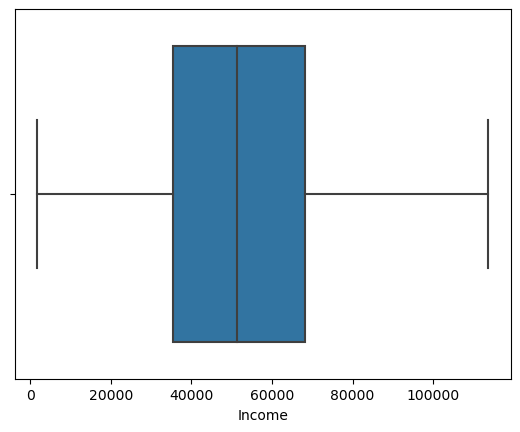

In [19]:
fig = sns.boxplot(x= "Income", data=dfStats)

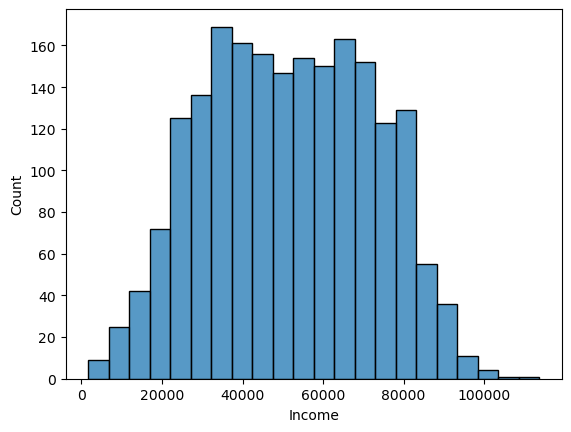

In [20]:
fig2 = sns.histplot(data=dfStats, x="Income")

Existe uma boa distribuição nessa base e tem apenas um ponto de outlier (que deve ser o maior salário da base) 

In [22]:
# Defining the simetry of each numerical attribute
skewness = []
for column in df_validated.columns:
  if df_validated[column].dtypes != 'object':
    skewness.append(df_validated[column].skew())
    print(f"{column} = {df_validated[column].skew()}")



Income = 0.004357040710783565
Kidhome = 0.6218430205714103
Teenhome = 0.40833520353082936
Recency = 0.0010719153412362974
MntWines = 1.1639780220733098
MntFruits = 2.1035903124450397
MntMeatProducts = 1.8294948424643116
MntFishProducts = 1.9207131041977832
MntSweetProducts = 2.1093373735164054
MntGoldProds = 1.8478252960743538
NumDealsPurchases = 2.334300908088142
NumWebPurchases = 1.2367274179046837
NumCatalogPurchases = 1.4031253727375477
NumStorePurchases = 0.705856997807428
NumWebVisitsMonth = 0.2791862510786148
AcceptedCmp3 = 3.2373460301427768
AcceptedCmp4 = 3.183837277347726
AcceptedCmp5 = 3.307047644999281
AcceptedCmp1 = 3.5048773745902495
AcceptedCmp2 = 8.651872578281166
Complain = 10.175046431245226
Z_CostContact = 0
Z_Revenue = 0
Response = 1.9198265231163965
Age = 0.0921129011693123
Customer_Days = -0.006471581459645869
MntTotal = 0.9194209756134192
MntRegularProds = 0.9855993522210876
AcceptedCmpOverall = 2.6946824813110606
kids = 0.3982182329114797
expenses = 0.9194209756

In [23]:
# calcular o coeficiente de variação
dfStats["Income"].std()/dfStats["Income"].mean()*100

40.07379553227723

40% é o número do coeficiente de variação do salário. Isso significa que os dados variam 40% em relação a média. Quanto mais próximo de 1 (100%) mais dispersos são os dados em relação à média.



In [24]:
dfStats["Income"].skew()

0.004357040710783565

Com esse resultado de skew da pra ver que os dados estão com uma curva normal com uma assimétrica positiva (para a direita) bem pequena que pode ser visto no gráfico ***fig2***

### Grau educacional dos clientes

In [25]:
graph = df_validated.groupby("education_level")['Income'].count()
graph

education_level
2n Cycle       183
Basic           49
Graduation    1015
Master         335
PhD            439
Name: Income, dtype: int64

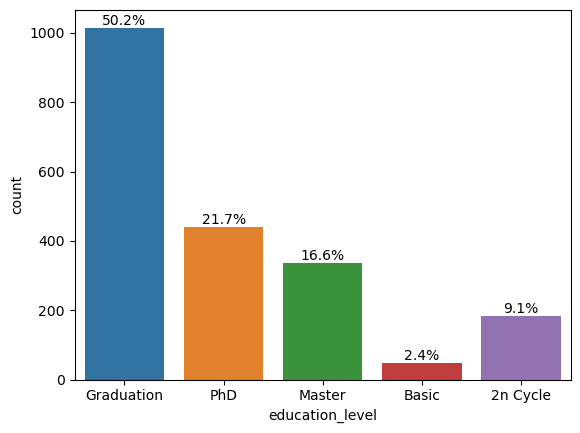

In [26]:
#sns.countplot(x=df_validated["education_level"])
ax = sns.countplot(x='education_level', data=df_validated)

# get the total count of the type column
total = df_validated['education_level'].count()

# annotate the bars with fmt from matplotlib v3.7.0
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
plt.show()

Mais de 85% da base já passou pelo menos pela graduação.

O salário não pode ser definido pelo grau de educação já que são salários que são próximos (min e max). Mas vamos validar essa informação com um gráfico de correlação entre salário e grau de educação.


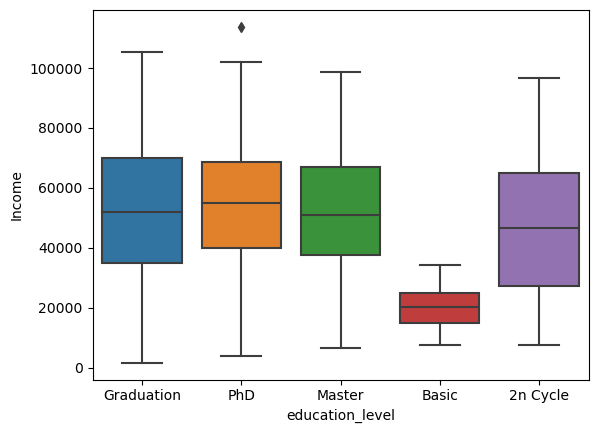

In [27]:
fig = sns.boxplot(x= "education_level", y="Income", data=df_validated)

Apenas os cadastros que possuem nível de estudo Basic tem um salário menor. De restante a distribuição é bem uniforme, contendo apenas um ponto de outlier que tudo indica é o maior salário da base como foi visto já no notebook.

### Estado civil dos clientes

In [28]:
df_validated["marital_status"].value_counts()

marital_status
Married     785
Together    509
Single      443
Divorced    214
Widow        70
Name: count, dtype: int64

<Axes: xlabel='marital_status', ylabel='count'>

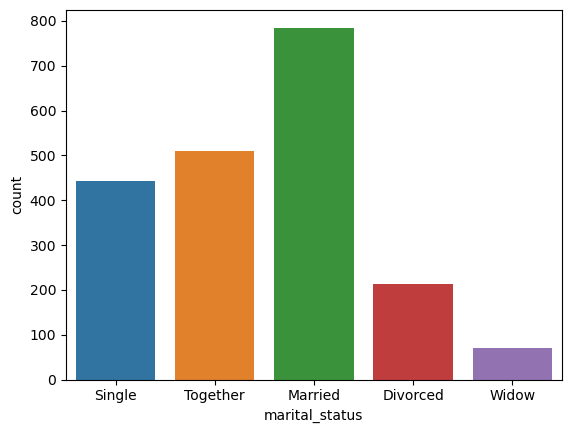

In [29]:
sns.countplot(x=df_validated["marital_status"])

Casados são grande maioria nesse conjunto de dados.

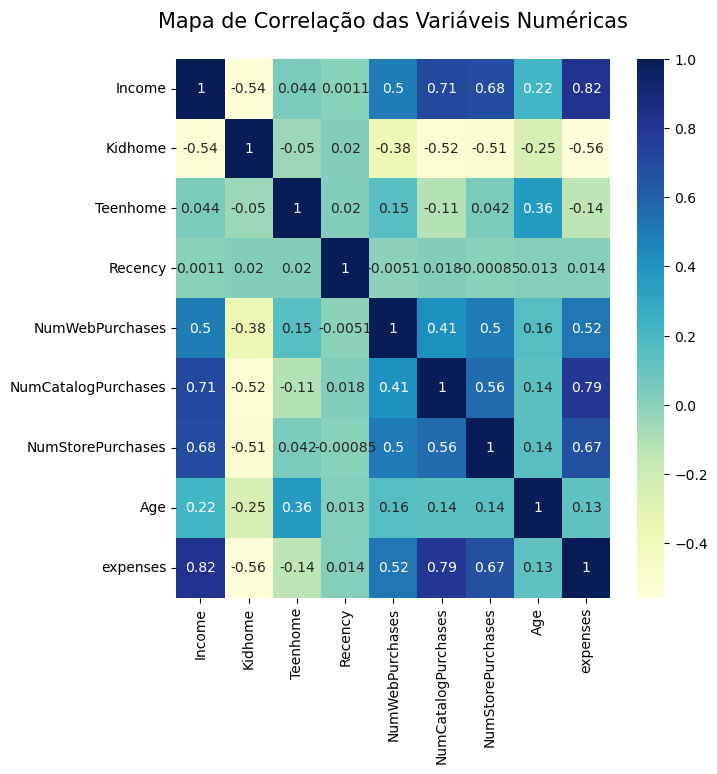

In [30]:
plt.figure(figsize = (7,7))
sns.heatmap(dfStats.corr("pearson"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

Os gastos aparentemente tem um correlação muito forte com o salário.... Vamos provar isso

<Axes: xlabel='expenses', ylabel='Income'>

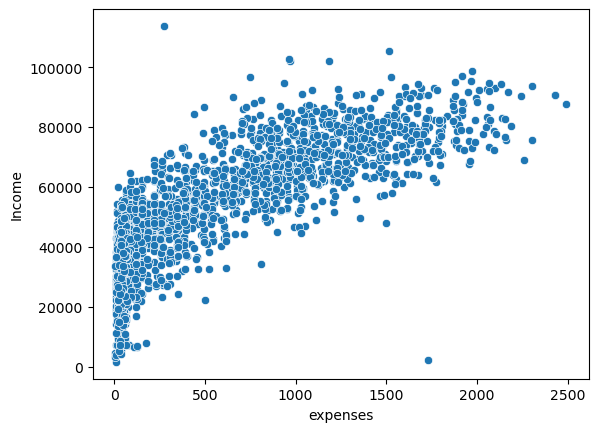

In [31]:
sns.scatterplot(x="expenses", y="Income", data=dfStats)


### Perguntas para responder:
1. Vamos entender como as campanhas afetam os clientes e como podemos trabalhar para aumentar, se haver necessidade, a efetividade da mesma.

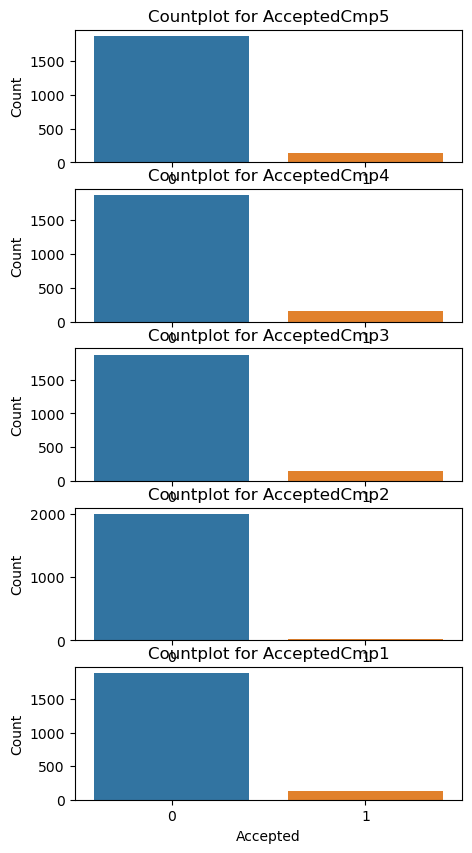

In [32]:
colunas = ["AcceptedCmp5", "AcceptedCmp4", "AcceptedCmp3", "AcceptedCmp2", "AcceptedCmp1"]
fig, axes = plt.subplots(5, 1, figsize=(5, 10))


# Loop para criar os gráficos
for i, coluna in enumerate(colunas):
    sns.countplot(x=df_validated[coluna], ax=axes[i])
    axes[i].set_title(f'Countplot for {coluna}')
    axes[i].set_xlabel('Accepted')
    axes[i].set_ylabel('Count')

Os clientes que aderem as campanhas são muito baixos. Vamos ver quais são os perfis deles.

In [33]:
df_campaing = df_validated[(df_validated["AcceptedCmp1"]==1) | 
                           (df_validated["AcceptedCmp2"]==1) |
                          (df_validated["AcceptedCmp3"]==1) |
                          (df_validated["AcceptedCmp4"]==1) |
                          (df_validated["AcceptedCmp5"]==1)]

df_out_campaing = df_validated[(df_validated["AcceptedCmp1"]==0) &
                           (df_validated["AcceptedCmp2"]==0) &
                          (df_validated["AcceptedCmp3"]==0) &
                          (df_validated["AcceptedCmp4"]==0) &
                          (df_validated["AcceptedCmp5"]==0)]

In [34]:
print(df_campaing["marital_status"].count())
print(df_out_campaing["marital_status"].count())

426
1595


426 clientes foram impactados por campanhas apenas (1.595 não foram ainda), vamos ver qual é o status civil e a gradução desses clientes


<Axes: xlabel='marital_status', ylabel='count'>

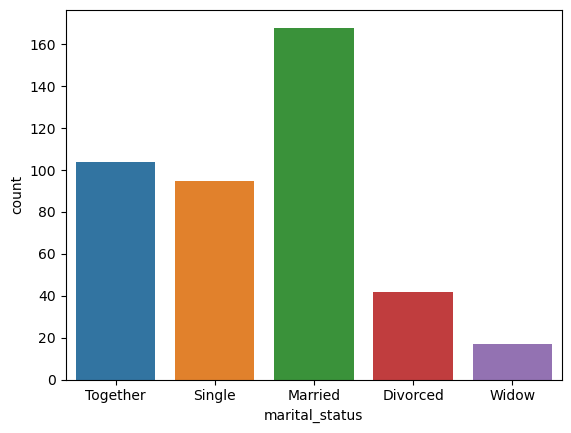

In [35]:
sns.countplot(x=df_campaing["marital_status"])

In [36]:
campaing = df_campaing.groupby("marital_status")['Income'].count()
campaing

marital_status
Divorced     42
Married     168
Single       95
Together    104
Widow        17
Name: Income, dtype: int64

In [37]:
df1 = df_validated.groupby("marital_status")['Income'].count()
df1

marital_status
Divorced    214
Married     785
Single      443
Together    509
Widow        70
Name: Income, dtype: int64

In [38]:
dfteste = df_out_campaing.groupby("marital_status")['Income'].count()

In [39]:
media = df1/dfteste-1

In [40]:
media

marital_status
Divorced    0.244186
Married     0.272285
Single      0.272989
Together    0.256790
Widow       0.320755
Name: Income, dtype: float64

In [41]:
media.mean()

0.27340092878244715

Em média, 27% da base é adarente a campanha. Tendo as viuvas com aderencia maior que o restante. Vamos ver se o grau de educação diz a mesma coisa

In [42]:
a = df_campaing.groupby("education_level")['Income'].count()
a

education_level
2n Cycle       34
Basic           5
Graduation    213
Master         70
PhD           104
Name: Income, dtype: int64

In [43]:
b = df_out_campaing.groupby("education_level")['Income'].count()

In [44]:
media = a/b

In [45]:
media

education_level
2n Cycle      0.228188
Basic         0.113636
Graduation    0.265586
Master        0.264151
PhD           0.310448
Name: Income, dtype: float64

In [46]:
median = media.mean()
std = media.std()
cv = median/std

print(median)
print(std)
print(cv)


0.23640180452048504
0.07457103843792416
3.170155726304859


Aqui tem um resultado menos favorável, 18% em média é aderente a campanha. O que é interessante é ver que quem tem graduação tem uma aderencia maior (>25%)

Vamos ver o salario médio dos que aderem a campanha 

In [47]:
print(df_campaing[["Income","Age"]].mean())
print(df_campaing[["Income","Age"]].max())
print(df_campaing[["Income","Age"]].min())

Income    64994.223005
Age          51.525822
dtype: float64
Income    105471.0
Age           79.0
dtype: float64
Income    5648.0
Age         24.0
dtype: float64


In [48]:
print(df_out_campaing[["Income", "Age"]].mean())
print(df_out_campaing[["Income", "Age"]].max())
print(df_out_campaing[["Income","Age"]].min())

Income    48133.173041
Age          51.008150
dtype: float64
Income    113734.0
Age           80.0
dtype: float64
Income    1730.0
Age         24.0
dtype: float64


<Axes: xlabel='expenses', ylabel='Income'>

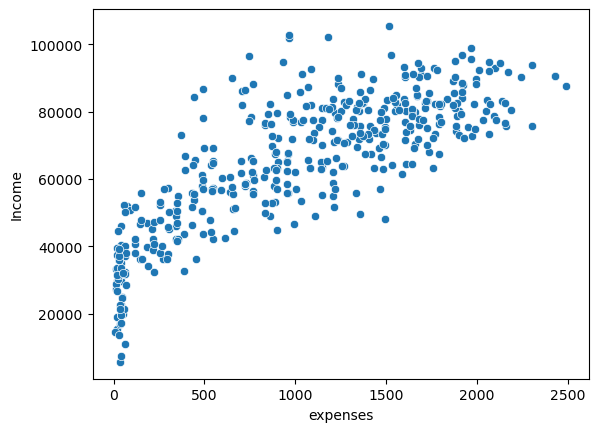

In [49]:

sns.scatterplot(x="expenses", y="Income", data=df_campaing)


In [50]:
semcampanhaTotal = df_out_campaing['Income'].sum()
semcampanhaMedia = df_out_campaing['expenses'].mean()

<Axes: xlabel='expenses', ylabel='Income'>

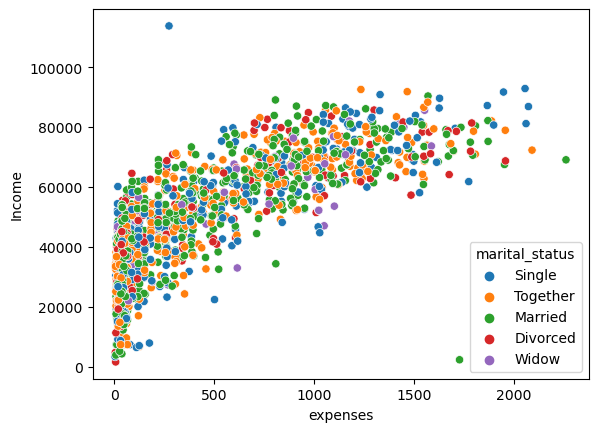

In [51]:
sns.scatterplot(x="expenses", y="Income", hue="marital_status", data=df_out_campaing)

In [52]:
campanhaTotal = df_campaing['Income'].sum()
campanhaMedia = df_campaing['expenses'].mean()
semcampanhaTotal = df_campaing['expenses'].mean()

In [53]:
#Quem gasta mais?

print(semcampanhaTotal)
print(campanhaTotal)
print(campanhaMedia)
print(semcampanhaMedia)

print(campanhaTotal/semcampanhaTotal)

1022.9295774647887
27687539.0
1022.9295774647887
441.15987460815046
27066.90627581649


36% da base é referente a campanhas. Esse número pode ser interessante já que de uma forma ou de outra o  cliente utilizou a campanha em algum momento da vida útil dele. Além do gasto médio ser muito maior do que aqueles que não são aderentes.

## O que podemos ver com esses dados?

Campanhas de marketing devem se forem distribuidas a pessoas com grau de ensino acima de graduação tem uma chance maior de serem efetivas. O status civil também não gera nenhum impacto aqui, podendo ser qualquer um. Além disso, está provado que quanto maior a maior mais será o gasto dentro da plataforma, o que indica que essas pessoas talvez não tenham tempo suficiente para cozinhar e são facilmente aderentes a pedir comida.